# Лабораторная работа 1
#### Выполнила Алексюнина Юлия, группа М8О-407

### Условие

- Необходимо реализовать алгоритмы машинного обучения.
    - 1) ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
    - 2) KNN
    - 3) SVM
    - 4) ДЕРЕВО РЕШЕНИЙ
    - 5) RANDOM FOREST
- Применить данные алгоритмы на наборы данных, подготовленных в первой лабораторной работе.
- Провести анализ полученных моделей, вычислить метрики классификатора.
- Произвести тюнинг параметров в случае необходимости.
- Сравнить полученные результаты с моделями реализованными в scikit-learn.
- Аналогично построить метрики классификации.
- Показать, что полученные модели не переобучились.
- Также необходимо сделать выводы о применимости данных моделей к вашей задаче.


Обязательно:

1) ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

2) KNN

3) ДЕРЕВО РЕШЕНИЙ

4) RANDOM FOREST

Полезные ссылки:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html https://tproger.ru/translations/top-machine-learning-algorithms/ 
https://tproger.ru/translations/hitchhikers-guide-to-ml/

### Первый датасет

Для выполнения данной лабораторной я выбрала датасет болезней сердца, так как он наиболее подходит для задачи классификации. База данных содержит 76 атрибутов, таких как возраст, пол, тип боли в груди, артериальное давление в покое и другие.

Импортируем необходимые для работы библиотеки.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

Считываем данные и выведем первые 5 строк для визуализации.

In [2]:
ds = pd.read_csv('/Users/linuxoid/Desktop/VUZICH/ML/input_data/heart.csv')

ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Проверим имеются ли в наших данных пропуски.

In [3]:
ds.drop([48, 92, 158, 163, 164, 251, 281], inplace = True)

Я исправила данные, теперь можно изменить заголовки колонок в более читабельный вид.

In [4]:
ds.columns = ['Age', 'Sex', 'Chest Pain Type',
              'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar',
              'Rest ECG', 'Max Heart Rate Achieved', 'Exercise Induced Angina',
              'ST Depression', 'ST Slope', 'Number Major Vessels',
              'Thalassemia', 'Heart Disease']

ds.replace({'Sex':{0:'Female', 1:'Male'},
            'Chest Pain Type':{0:'Asymptomatic', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Typical Angina'},
            'Fasting Blood Sugar':{1:'> 120 mg/dl',0:'< 120 mg/dl'},
            'Rest ECG':{0:'Left Ventricular Hypertrophy', 1:'Normal', 2:'ST-T wave abnormality'},
            'Exercise Induced Angina':{1:'Yes', 0:'No'},
            'ST Slope':{0:'Downsloping', 1:'Flat', 2:'Upsloping'},
            'Thalassemia':{1:'Fixed Defect', 2:'Normal', 3:'Reversible Defect'},
            'Heart Disease':{0:'Yes', 1:'No'}}, inplace = True)
ds.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Rest ECG,Max Heart Rate Achieved,Exercise Induced Angina,ST Depression,ST Slope,Number Major Vessels,Thalassemia,Heart Disease
0,63,Male,Typical Angina,145,233,> 120 mg/dl,Left Ventricular Hypertrophy,150,No,2.3,Downsloping,0,Fixed Defect,No
1,37,Male,Non-Anginal Pain,130,250,< 120 mg/dl,Normal,187,No,3.5,Downsloping,0,Normal,No
2,41,Female,Atypical Angina,130,204,< 120 mg/dl,Left Ventricular Hypertrophy,172,No,1.4,Upsloping,0,Normal,No
3,56,Male,Atypical Angina,120,236,< 120 mg/dl,Normal,178,No,0.8,Upsloping,0,Normal,No
4,57,Female,Asymptomatic,120,354,< 120 mg/dl,Normal,163,Yes,0.6,Upsloping,0,Normal,No


Так как анализ данных проводился в предыдущей лабораторной, то я сразу добавлю факторы, влияющие на наличие болезней сердца в список impacts.

In [5]:
impacts = []
impacts.append('Sex')
impacts.append('Chest Pain Type')
impacts.append('Rest ECG')
impacts.append('Exercise Induced Angina')
impacts.append('ST Depression')
impacts.append('ST Slope')
impacts.append('Number Major Vessels')

In [6]:
print(impacts)

['Sex', 'Chest Pain Type', 'Rest ECG', 'Exercise Induced Angina', 'ST Depression', 'ST Slope', 'Number Major Vessels']


Удалим колонки, которые не влияют на наличие сердечной болезни.

In [7]:
ds.drop(['Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar'], axis = 1, inplace = True)
y = ds['Heart Disease']

ds.drop(['Heart Disease'], axis = 1, inplace = True)

x = ds


In [8]:
my_y = y
my_y.replace({'Yes':1, 'No':0}, inplace = True)

Преобразуем категориальные признаки в количественные, применив векторизацию с помощью метода get_dummies.

In [9]:
x = pd.get_dummies(x)

my_x = x

Разделим данные на тренировочные и тестировочные.

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print ('Train set:  ', x_train.shape,  y_train.shape)
print ('Test set:   ', x_test.shape,  y_test.shape)

Train set:   (236, 22) (236,)
Test set:    (60, 22) (60,)


Нормализуем данные.

In [11]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

Определим функцию печати, где вычисляется точность и матрица ошибок как для тренировочных данных, так и для тестовых.

- (TN) True Negative: фактическое значение было False, а модель предсказывала False.
    - Правильно определено, что у человека нет болезни сердца.
- (FP) False Positive: Фактическое значение было False, и модель предсказывала True. Это также известно как ошибка типа I.
    - Было предсказано, что у человека есть болезнь сердца, но на самом деле это не так.
- (FN) False Negative: фактическим значением было True, и модель предсказывала False. Это также известно как ошибка типа II.
    - Предсказано, что у человека нет болезни сердца, но на самом деле она есть.
- (TP) True Positive: фактическое значение было True, и модель предсказывала True
    - Он правильно определил, что у человека есть болезнь сердца.

#### Precision, Recall, F1-score, Accuracy


##### Precision = TP / (TP + FP)

Когда предсказано, что у человека есть болезнь сердца, как часто это действительно корректно?
  

##### Recall = TP / (TP + FN)

Когда действительно у человека есть болезнь сердца, как часто это предсказано правильно?


##### F1 = 2 / (  (1 / Recall) + (1 / Precision) ) = 2 * (Precision * Recall) / (Precision + Recall)

Средневзвешенное значение между Precision и Recall. Полезно при работе с несбалансированными образцами.


##### Accuracy = (TP + TN) / (TP + TN + FP + FN)

Сумма истинных положительных и отрицательных значений, деленная на общее количество образцов. Это верно только в том случае, если модель сбалансирована. Это даст неточные результаты, если будет дисбаланс классов.

In [12]:
def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred, pos_label='Yes') * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred, pos_label='Yes') * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred, pos_label='Yes') * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred, pos_label='Yes') * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred, pos_label='Yes') * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred, pos_label='Yes') * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Обучение и тестирование модели машинного обучение осуществляется при использовании ряда алгоритмов машинного обучения.

### 1. Логистическая регрессия.

Значение термина регрессия очень простое: любой процесс, который пытается найти связь между переменными, называется регрессией. Логистическая регрессия - это регрессия, поскольку она находит связи между переменными. А логистическая она потому, что использует логистическую функцию в качестве функции связи.

Построим классификационную модель, используя логистическую регрессию и выведем значения полученных метрик.

In [13]:
accuracies = {}

lr = LogisticRegression(class_weight = 'balanced', tol = 1e-10)

lr.fit(x_train, y_train)
print_score(lr, x_train, y_train, x_test, y_test, train = True)
print_score(lr, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 85.59%
_______________________________________________
Classification Report:	Precision Score: 83.33%
			Recall Score: 83.33%
			F1 score: 83.33%
_______________________________________________
Confusion Matrix: 
 [[117  17]
 [ 17  85]]

Test Result:
Accuracy Score: 83.33%
_______________________________________________
Classification Report:	Precision Score: 92.86%
			Recall Score: 76.47%
			F1 score: 83.87%
_______________________________________________
Confusion Matrix: 
 [[24  2]
 [ 8 26]]



В словаре accuracies будут хранится тестовая точность предсказания для каждого алгоритма машинного обучения.
results_df - таблица, в которой для каждой модели хранится тренировочная точность предсказания и тестовая.

In [14]:
train_score = accuracy_score(y_train, lr.predict(x_train)) * 100
test_score = accuracy_score(y_test, lr.predict(x_test)) * 100

accuracies['Logistic Regression'] = test_score

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.59322,83.333333


Точность на тренировке:
Тестовая точность:

### 2. kNN

Расшифровывается как k-Nearest Neighbor или k-Ближайших Соседей. Простой алгоритм, который хранит все доступные случаи и классифицирует новые случаи на основе меры сходства (например, функции расстояния).  kNN был использован в статистической оценке и распознавании образов.

Построим классификационную модель, используя алгоритм k-ближайших соседей и выведем значения полученных метрик.

In [15]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print_score(knn, x_train, y_train, x_test, y_test, train = True)
print_score(knn, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 85.59%
_______________________________________________
Classification Report:	Precision Score: 85.42%
			Recall Score: 80.39%
			F1 score: 82.83%
_______________________________________________
Confusion Matrix: 
 [[120  14]
 [ 20  82]]

Test Result:
Accuracy Score: 86.67%
_______________________________________________
Classification Report:	Precision Score: 93.33%
			Recall Score: 82.35%
			F1 score: 87.50%
_______________________________________________
Confusion Matrix: 
 [[24  2]
 [ 6 28]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для kNN модели.

In [16]:
test_score = accuracy_score(y_test, knn.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn.predict(x_train)) * 100

accuracies['KNN'] = test_score

tmp = pd.DataFrame(data=[["KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.59322,83.333333
1,KNN,85.59322,86.666667


### 3. Decision Tree

Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение. 

Построим классификационную модель, используя дерево решений и выведем значения полученных метрик.

In [17]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(x_train, y_train)

print_score(dt, x_train, y_train, x_test, y_test, train = True)
print_score(dt, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[134   0]
 [  0 102]]

Test Result:
Accuracy Score: 63.33%
_______________________________________________
Classification Report:	Precision Score: 73.08%
			Recall Score: 55.88%
			F1 score: 63.33%
_______________________________________________
Confusion Matrix: 
 [[19  7]
 [15 19]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для Decision Tree модели.

In [18]:
test_score = accuracy_score(y_test, dt.predict(x_test)) * 100
train_score = accuracy_score(y_train, dt.predict(x_train)) * 100

accuracies['Decision Tree Classifier'] = test_score

tmp = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.59322,83.333333
1,KNN,85.59322,86.666667
2,Decision Tree Classifier,100.00000,63.333333


### 4. Random Forest

Случайные леса или леса случайных решений - это метод обучения комитета (ансамбля)  решающих деревьев для классификации, регрессии и кластеризации. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.

Наиболее важным параметром класса RandomForestClassifier является параметр n_estimators. Этот параметр определяет количество деревьев в случайном лесу.

Построим классификационную модель, используя случайный лес и выведем значения полученных метрик.

In [19]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

rf.fit(x_train, y_train)

print_score(rf, x_train, y_train, x_test, y_test, train = True)
print_score(rf, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[134   0]
 [  0 102]]

Test Result:
Accuracy Score: 81.67%
_______________________________________________
Classification Report:	Precision Score: 96.00%
			Recall Score: 70.59%
			F1 score: 81.36%
_______________________________________________
Confusion Matrix: 
 [[25  1]
 [10 24]]



98,90% - это довольно хорошая точность, так что в любом случае нет смысла увеличивать или уменьшать количество n_estimators. Чтобы повысить точность, нужно урегулировать другие параметры класса.

Добавляем в табличку значения тестовой и тренировочной точности предсказания для Random Forest модели.

In [20]:
test_score = accuracy_score(y_test, rf.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf.predict(x_train)) * 100

accuracies['Random Forest'] = test_score

tmp = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)

Построим график, показывающий тестовые точности всех моделей.

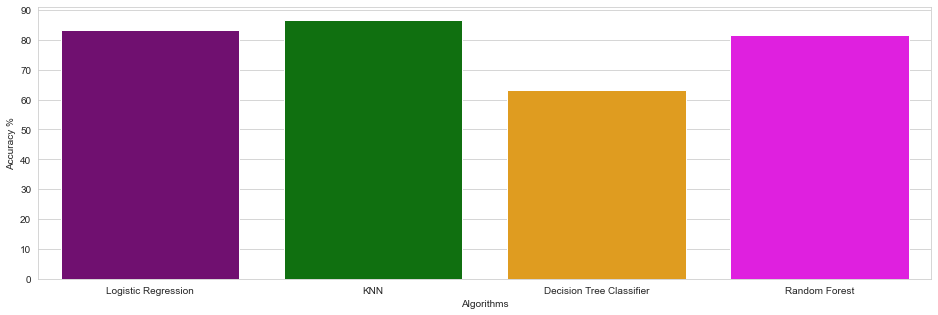

In [21]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize = (16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = colors)
plt.show()

На тестовых данных выигрывает . В то время как на тренировочных выигрышные позиции удерживают два алгоритма, Decision Tree Classifier и Random Forest Classifier.

In [22]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.59322,83.333333
1,KNN,85.59322,86.666667
2,Decision Tree Classifier,100.00000,63.333333
3,Random Forest Classifier,100.00000,81.666667


Наихудший результат и дерева решений - 63%, выигрывает алгоритм kNN на тестовых данных с точностью предсказания 86%, а на тренировочных  хорошо себя показали как дерево решений,так и случайный лес с точностью в 100%.

## Применение алгоритмов машинного обучения с использованием тюнинга гиперпараметров


Тюнинг моделей машинного обучения является одной из задач оптимизации. У нас есть набор гиперпараметров, и мы стремимся найти правильную комбинацию их значений, которая может помочь нам найти либо минимум (например, потери), либо максимум (например, точность) функции.

В Grid Search (Поиск по сетке) мы настраиваем сетку гиперпараметров и обучаем / тестируем нашу модель на каждой из возможных комбинаций.

Поиск по сетке медленнее по сравнению со случайным поиском, но в целом он может быть более эффективным, поскольку может проходить через все пространство поиска. Вместо этого случайный поиск может быть быстрее, но может пропустить некоторые важные моменты в пространстве поиска.

### 1. Logistic Regression Hyperparameter Tuning

Grid Search может быть реализован в Python с помощью scikit-learn GridSearchCV() функции. Я разделила наш тренировочный набор на 5 (cv = 5).

In [23]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring = "accuracy",
                              n_jobs=-1, verbose=1, cv=5, iid = True)
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
/Users/linuxoid/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [24]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Обучаем модель с помощью логистической регрессии и затем выводим полученные метрики после предсказаний.

In [25]:
log_reg = LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

log_reg.fit(x_train, y_train)

print_score(log_reg, x_train, y_train, x_test, y_test, train = True)
print_score(log_reg, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 85.59%
_______________________________________________
Classification Report:	Precision Score: 85.42%
			Recall Score: 80.39%
			F1 score: 82.83%
_______________________________________________
Confusion Matrix: 
 [[120  14]
 [ 20  82]]

Test Result:
Accuracy Score: 83.33%
_______________________________________________
Classification Report:	Precision Score: 96.15%
			Recall Score: 73.53%
			F1 score: 83.33%
_______________________________________________
Confusion Matrix: 
 [[25  1]
 [ 9 25]]



Создаем табличку, в которой хранятся значения тестовой и тренировочной точности предсказания для каждой модели машинного обучения.

In [26]:
test_score = accuracy_score(y_test, log_reg.predict(x_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(x_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.59322,83.333333


### 2. K-Nearest Neighbors Hyperparameter Tuning


In [27]:
train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(x_train)))
    test_score.append(accuracy_score(y_test, model.predict(x_test)))

Построим график, чтобы увидеть при каком количестве neighbours на тестовых данных оценка будет максимальной, это и будет лучшим параметром для алгоритма KNN.

Maximum KNN score on the test data: 90.00%


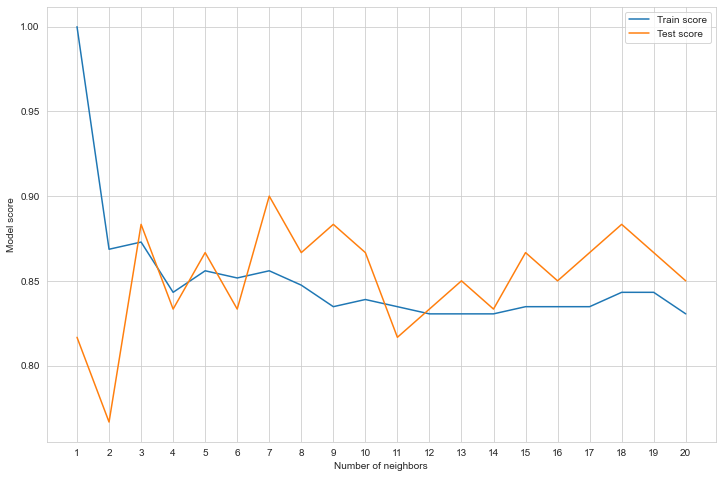

In [28]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label = "Train score")
plt.plot(neighbors, test_score, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score) * 100:.2f}%")

Обучаем модель на количестве соседей равных 7, так как при таком количестве получили максимальную точность в 90%, и затем выводим полученные метрики после предсказаний.

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
knn_classifier.fit(x_train, y_train)

print_score(knn_classifier, x_train, y_train, x_test, y_test, train = True)
print_score(knn_classifier, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 85.59%
_______________________________________________
Classification Report:	Precision Score: 83.33%
			Recall Score: 83.33%
			F1 score: 83.33%
_______________________________________________
Confusion Matrix: 
 [[117  17]
 [ 17  85]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
Classification Report:	Precision Score: 93.75%
			Recall Score: 88.24%
			F1 score: 90.91%
_______________________________________________
Confusion Matrix: 
 [[24  2]
 [ 4 30]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для kNN модели.

In [30]:
test_score = accuracy_score(y_test, knn_classifier.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data = [["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.59322,83.333333
1,Tuned K-nearest neighbors,85.59322,90.000000


### 3. Decision Tree Classifier Hyperparameter Tuning

In [31]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state = 42)
grid_search_cv = GridSearchCV(tree, params, scoring = "accuracy",
                              n_jobs = -1, verbose = 1, cv = 3, iid = True)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   10.2s finished
/Users/linuxoid/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid=True, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_d

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [32]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Обучаем модель и затем выводим полученные метрики после предсказаний.

In [33]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
tree.fit(x_train, y_train)

print_score(tree, x_train, y_train, x_test, y_test, train = True)
print_score(tree, x_train, y_train, x_test, y_test, train = False)

Train Result:
Accuracy Score: 88.56%
_______________________________________________
Classification Report:	Precision Score: 91.21%
			Recall Score: 81.37%
			F1 score: 86.01%
_______________________________________________
Confusion Matrix: 
 [[126   8]
 [ 19  83]]

Test Result:
Accuracy Score: 71.67%
_______________________________________________
Classification Report:	Precision Score: 84.00%
			Recall Score: 61.76%
			F1 score: 71.19%
_______________________________________________
Confusion Matrix: 
 [[22  4]
 [13 21]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для Decision Tree модели.

In [34]:
test_score = accuracy_score(y_test, tree.predict(x_test)) * 100
train_score = accuracy_score(y_train, tree.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data = [["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.593220,83.333333
1,Tuned K-nearest neighbors,85.593220,90.000000
2,Tuned Decision Tree Classifier,88.559322,71.666667


### 4. Random Forest Classifier Hyperparameter Tuning

В случайном поиске мы создаем сетку гиперпараметров и обучаем / тестируем нашу модель только на некоторой случайной комбинации этих гиперпараметров
сначала определив сетку гиперпараметров, которые будут случайным образом выбираться при вызове RandomizedSearchCV().

In [35]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [36]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Обучаем модель.

In [37]:
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Печатаем полученные метрики после предсказаний.

In [38]:
print_score(rand_forest, x_train, y_train, x_test, y_test, train=True)
print_score(rand_forest, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[134   0]
 [  0 102]]

Test Result:
Accuracy Score: 80.00%
_______________________________________________
Classification Report:	Precision Score: 92.31%
			Recall Score: 70.59%
			F1 score: 80.00%
_______________________________________________
Confusion Matrix: 
 [[24  2]
 [10 24]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью алгоритма Random Forest.

In [39]:
test_score = accuracy_score(y_test, rand_forest.predict(x_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data = [["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.593220,83.333333
1,Tuned K-nearest neighbors,85.593220,90.000000
2,Tuned Decision Tree Classifier,88.559322,71.666667
3,Tuned Random Forest Classifier,100.000000,80.000000


Анализируя полученную табличку, видно, что на тренировочных данных выигрывает алгоритм Random Forest с настроенными гиперпараметрами с точностью 100%, а на тестовых алгоритм kNN с точностью предсказания в 90%.

### Собственная реализация алгоритмов

Для работы с моделями переведем в данные в форму *numpy* массивов. Мне понадобятся эти переменные при реализации собственных алгоритмов.

In [40]:
my_x = pd.get_dummies(my_x)
my_x = my_x.to_numpy()
my_y = my_y.to_numpy()

Разделим данные на тренировочные и тестировочные.

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


x_train1, x_test1, y_train1, y_test1 = train_test_split(my_x, my_y, test_size=0.2)
print ('Train set:  ', x_train1.shape,  y_train1.shape)
print ('Test set:   ', x_test1.shape,  y_test1.shape)

Train set:   (236, 22) (236,)
Test set:    (60, 22) (60,)


Нормализуем данные.

In [42]:
x_train1 = preprocessing.scale(x_train1)
x_test1 = preprocessing.scale(x_test1)

Определим функцию печати, где вычисляется точность и матрица ошибок как для тренировочных данных, так и для тестовых.

In [43]:
def Accuracy(Y_val, Y_pred):
    TP = (Y_val * Y_pred).sum()
    TN = np.logical_not(Y_val | Y_pred).sum()
    return (TP + TN) / len(Y_val)

def Precision(Y_val, Y_pred):
    TP = (Y_val * Y_pred).sum()
    return TP / Y_pred.sum()

def Recall(Y_val, Y_pred):
    TP = (Y_val * Y_pred).sum()
    return TP / Y_val.sum()

def F1(Y_val, Y_pred):
    precision = Precision(Y_val, Y_pred)
    recall = Recall(Y_val, Y_pred)
    return 2.0 * recall * precision / (precision + recall)

In [44]:
def print_myscore(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {Accuracy(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {Precision(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {Recall(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {F1(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {Accuracy(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {Precision(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {Recall(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {F1(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [45]:
def my_sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

def my_logit_loss(wx, y_real):
    return np.log(1.0 + np.exp(-wx*y_real)).sum()

# gradient over weights vector
def my_logit_grad(x, y, w):
    koeff = (y * my_sigmoid(-y*x.dot(w)))
    koeff = koeff.reshape((koeff.shape[0], 1)) 
    return -(koeff * x).sum(axis = 0) 

# Gradients from the norm
def my_L2_grad(vector):
    return vector

def my_L1_grad(vector):
    return vector / np.abs(vector)

In [46]:
# Gradient Descent Solver

class Gradient_Descent:
    def __init__(self, speed, gradient_func, regulasator=None, 
                 C=10.0, eps = 0.001, maxsteps=250):
        self.speed = speed
        self.function = gradient_func
        self.maxsteps = maxsteps
        self.eps = eps
        if regulasator == "l1":
            self.regulasator = lambda w:  my_L1_grad(w) / C
        elif regulasator == "l2":
            self.regulasator = lambda w: my_L2_grad(w) / C
        else:
            self.regulasator = lambda w: 0.0
    
    def fit(self, X_train, Y_train):
        w0 = np.zeros(X_train.shape[1])
        w = np.random.random(X_train.shape[1])
        k = 1
        while np.linalg.norm(w - w0) > self.eps and k <= self.maxsteps:
            w0 = w
            temp = self.speed * ((1 / k)**0.5)
            w = w - temp*(self.function(X_train, Y_train, w) + self.regulasator(w))
            k += 1
            
        return w

In [47]:
# logistic regression with 2 classes: 0 and 1.
class MyLogisticRegression:
    # main parameters
    def __init__(self, speed=1.5, reg_type=None, C=2.0, eps=0.001, maxsteps=200):
        # init solver
        self.solver = Gradient_Descent(speed, my_logit_grad, reg_type, C, eps, maxsteps)
        # init weight
        self.w = None
        
    # training
    def fit(self, X_train, Y_train):
        # convert 0 to -1 for algo
        Y = np.array(Y_train)
        Y[Y_train == 0] = -1
        # add np.ones colomn for w0 weight:
        x0 = np.ones((X_train.shape[0], 1))
        X = np.hstack((x0, X_train))
        # train weight by gradient descent
        self.w = self.solver.fit(X, Y)
        return self
    
    # returns predicted classes
    def predict(self, X_val, border = 0):
        # add np.ones colomn for w0 weight:
        x0 = np.ones((X_val.shape[0], 1))
        X = np.hstack((x0, X_val))
        # <w, x> product for all examples
        Xw = X.dot(self.w)
        # make predict: 0 - negative, 1 - positive
        Y_pred = np.zeros(Xw.shape).astype(np.int8)
        # a(x) = [<w,x> > t], t - border
        Y_pred[Xw >= border] = 1
        return Y_pred
    
    # probs of positive class
    def predict_proba(self, X_val):
        # add np.ones colomn for w0 weight:
        x0 = np.ones((X_val.shape[0], 1))
        X = np.hstack((x0, X_val))
        # <w, x> product for all examples
        Xw = X.dot(self.w)
        # return proba
        return sigmoid(Xw)
    
    # compute metrics
    def score(self, X_val, Y_val, metric=Accuracy):
        return metric(Y_val, self.predict(X_val))
    
    def weights(self):
        return self.w

    def __str__(self):
        return "Logistic Regression model with gradient descent!"
    
    def __repr__(self):
        return "Logistic Regression"

Построим классификационную модель, используя логистическую регрессию и выведем значения полученных метрик.

In [48]:
accuracies_own = {}

mylr = MyLogisticRegression()

mylr.fit(x_train1, y_train1)
print_myscore(mylr, x_train1, y_train1, x_test1, y_test1, train = True)
print_myscore(mylr, x_train1, y_train1, x_test1, y_test1, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[121   0]
 [  0 115]]

Test Result:
Accuracy Score: 98.33%
_______________________________________________
Classification Report:	Precision Score: 95.45%
			Recall Score: 100.00%
			F1 score: 97.67%
_______________________________________________
Confusion Matrix: 
 [[38  1]
 [ 0 21]]



В словаре accuracies_own будут хранится тестовая точность предсказания для каждого алгоритма машинного обучения. myresults_df - таблица, в которой для каждой модели хранится тренировочная точность предсказания и тестовая.

In [49]:
train_score1 = Accuracy(y_train1, mylr.predict(x_train1)) * 100
test_score1 = Accuracy(y_test1, mylr.predict(x_test1)) * 100

accuracies_own['My Logistic Regression'] = test_score1

myresults_df = pd.DataFrame(data=[["My Logistic Regression", train_score1, test_score1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
myresults_df

,Model,Training Accuracy %,Testing Accuracy %
0,My Logistic Regression,100.0,98.333333


### kNN

*Метод k ближайших соседей* не требует настройки параметров по обучающей выборке, а просто запоминает её и делает предсказания на основании классов ближайших соседей предсказываемого объекта. Для измерения близости необходимо задать метрику $\rho(x, y)$.

In [50]:
# Possible metrics for the algorithm
def solve_minkovski(x1, x2, p = 3):
    return (np.abs(x1 - x2) ** p).T.sum(axis = 0)**(1.0 / p)

def solve_euclid(x1, x2):
    return solve_minkovski(x1, x2, 2)

In [51]:
# Implementation of the method
# with the ability to take into account distances between neighbors,
# but without selecting reference elements and heuristics that accelerate
# the search for neighbors:
class MyKNN:
    def __init__(self, k=5, metric = solve_euclid, parsen_kernel = None):
        self.k = k
        self.p = metric
        # we should remember all data
        self.X = None
        self.Y = None
        if parsen_kernel is None:
            # all elements have equal weight
            self.Kp = lambda t: 1.0
        else:
            # parsen method
            self.Kp = parsen_kernel

    def stolp_filtration(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.X = X_train
        self.Y = Y_train
        self.k = min(self.k, len(self.Y) - 1)
        return self

    def predict(self, X_val):
        Y_pred = np.zeros(len(X_val)).astype(np.int8)
        # for each elem in X predict result:
        for i in np.arange(len(X_val)):
            Y_pred[i] = self.predict_one(X_val[i])
        return Y_pred

    def predict_one(self, x):
        # compute all distances
        r_x = self.p(self.X, x)
        # take sorted order of dists in indexes
        order = np.argsort(r_x)
        # width for parsen is distance to k+1 neighbor:
        h = r_x[order[self.k]]
        # indexes of first k elems neighbor
        order = order[:self.k]
        # take first k Y:
        Y_k = self.Y[order]
        # compute parsen function for all neighbor:
        K = self.Kp(r_x[order] / h)
        
        # compute functional for positives elems
        pos_w = (K * Y_k).sum()
        # compute functional for negatives elems
        neg_w = (K * np.logical_not(Y_k)).sum()
        
        # class with more functional wins
        return int(pos_w > neg_w) # 0 or 1


    def score(self, X_val, Y_val, metric=Accuracy):
        return metric(Y_val, self.predict(X_val))

    def __str__(self):
        return "k Nearest Neighbor"

    def __repr__(self):
        return "KNN"

Построим классификационную модель, используя алгоритм k-ближайших соседей и выведем значения полученных метрик.

In [52]:
myknn = MyKNN()
myknn.fit(x_train1, y_train1)

print_myscore(myknn, x_train1, y_train1, x_test1, y_test1, train = True)
print_myscore(myknn, x_train1, y_train1, x_test1, y_test1, train = False)

Train Result:
Accuracy Score: 91.53%
_______________________________________________
Classification Report:	Precision Score: 92.04%
			Recall Score: 90.43%
			F1 score: 91.23%
_______________________________________________
Confusion Matrix: 
 [[112   9]
 [ 11 104]]

Test Result:
Accuracy Score: 88.33%
_______________________________________________
Classification Report:	Precision Score: 76.92%
			Recall Score: 95.24%
			F1 score: 85.11%
_______________________________________________
Confusion Matrix: 
 [[33  6]
 [ 1 20]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для kNN модели.

In [53]:
train_score1 = Accuracy(y_train1, myknn.predict(x_train1)) * 100
test_score1 = Accuracy(y_test1, myknn.predict(x_test1)) * 100

accuracies_own['My kNN'] = test_score1

tmp = pd.DataFrame(data=[["My kNN", train_score1, test_score1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
myresults_df = myresults_df.append(tmp, ignore_index=True)
myresults_df

,Model,Training Accuracy %,Testing Accuracy %
0,My Logistic Regression,100.000000,98.333333
1,My kNN,91.525424,88.333333


### Decision Tree

In [54]:
# Implementation of a decision tree
# with the possibility of building a tree using the random subspace method,
# which is necessary to use the class as a base when building a Random Forest

In [55]:
class BinaryNode:
    def __init__(self, idxs=None, pos=None, neg=None, c=None):
        self.predicat = None
        self.left = None
        self.right = None
        self.positives = pos
        self.negatives = neg
        self.c = c
        self.idxs = idxs

    # setters:
    def set_left(self, left_node):
        self.left = left_node

    def set_idxs(self, idxs):
        self.idxs = idxs

    def set_right(self, right_node):
        self.right = right_node

    def set_predicat(self, predicat):
        self.predicat = predicat

    def set_class(self, c):
        self.c = c
        
    def set_positives(self, positives):
        self.positives = positives
        
    def set_negatives(self, negatives):
        self.negatives = negatives

    #getters:
    def get_left(self):
        return self.left

    def get_right(self):
        return self.right

    def get_class(self):
        return self.c

    def get_idxs(self):
        return self.idxs
    
    def get_positives(self):
        return self.positives
        
    def get_negatives(self):
        return self.negatives
    
    def get_len(self):
        return self.idxs.shape[0]

    #checkers:
    def is_leaf(self):
        return self.predicat is None

    def is_inner(self):
        return not self.is_leaf()
    
    def make_leaf(self):
        self.predicat = None
        self.left = None
        self.right = None

In [56]:
def bingini(*args):
    # for binary classification: p(-) = 1 - p(+)=>
    # Gini = 2 * p(+) * (1 - p(+))
    if len(args) == 2:
        p = args[0] / (args[1]+args[0])
    else:
        p = args[0].sum() / args[0].shape[0]
    return 2 * p * (1 - p)

def binentropy(*args):
    # for binary classification: p(-) = 1 - p(+)=>
    # Entropy = -p(+)log(p(+)) - (1 - p(+))log(1 - p(+))
    if len(args) == 2:
        p = args[0] / (args[1]+args[0])
    else:
        p = args[0].sum() / args[0].shape[0]
    return -p*np.log(p) - (1 - p)*np.log(p)

In [57]:
class MyDescisionTree:
    def __init__(self, criteria=bingini, pruning_cost=None, min_samples_split=2, random_sub_num=None):
        self.CATEGORICAL_LEN = 10
        self.is_categorical = None
        self.categorical_vals = {}
        self.H = criteria
        self.root = None
        self.min_split = min_samples_split
        if random_sub_num is None:
            self.random_subspace = False
        else:
            self.random_subspace = True
            self.feature_num = random_sub_num
        if pruning_cost is None:
            self.pruning = False
        else:
            self.pruning = True
            self.alpha = pruning_cost
            
    def node_classify(self, node):
        # set class num node:
        positives = node.get_positives()
        negatives = node.get_negatives()
        if positives >= negatives:
            node.set_class(1)
        else:
            node.set_class(0)
            
    # create root and recursive building tree
    def build_tree(self):
        # create root with all nums
        self.root = BinaryNode(np.arange(self.Y.shape[0]))
        self.root.set_positives(self.Y.sum())
        negatives = self.root.get_len() - self.root.get_positives()
        self.root.set_negatives(negatives)
        # recursive function of creation
        self.recursive_creation(self.root)
            
            
    # may be modifed
    def stop_criteria(self, node):
        # if num of eelems in node less than min required for split => 1
        if node.get_len() < self.min_split:
            return True
        # if all elems in node has only one class => 1
        positives = node.get_positives()
        negatives = node.get_negatives()
        return (negatives==0 or positives==0)
    
    # union of search_best_split() and split_node()
    def search_best_split(self, node):
        X_iter = self.X[node.get_idxs()]
        Y_iter = self.Y[node.get_idxs()]
        # compute node info criteria
        positiv = node.get_positives()
        negativ = node.get_negatives()
        node_info = self.H(positiv, negativ)
        # best params
        best_gain = 0.0
        best_j, best_t = 0, 0.0
        # search in all features:
        if self.random_subspace:
            # get random permutation
            features = np.random.permutation(self.X.shape[1])
            # stay only feature_num random features
            features = features[:self.feature_num]
        # else search by all features
        else:
            features = range(self.X.shape[1])

        for j in features:
            column = X_iter[:, j]
            # fast search if categorical:
            if self.is_categorical[j]:
                possible_vals = self.categorical_vals[j]
                for i in range(1, possible_vals.shape[0]):
                    mask = column < possible_vals[i]
                    Y_r = Y_iter[mask]
                    if Y_r.shape[0] == 0:
                        continue
                    right_pos = Y_r.sum()
                    right_neg = Y_r.shape[0] - right_pos
                    right_gini = self.H(right_pos, right_neg)
                    left_gini = self.H(positiv - right_pos, negativ - right_neg)
                    # Q(Rm, j, t) = H(Rm) - (|Rl|/|Rm|)H(Rl) - (|Rr|/|Rm|)H(Rr)
                    gain = node_info
                    gain -= (Y_r.shape[0]*right_gini/node.get_len())
                    gain -= (1 - Y_r.shape[0]/node.get_len())*left_gini
                    if gain > best_gain:
                        best_t = possible_vals[i]
                        best_j = j
                        best_gain = gain  
                continue
            # else standart search:
            sorted_col = np.argsort(column)
            right_neg = 0
            right_pos = 0
            last_t = column[sorted_col[0]]
            for i in range(1, column.shape[0]):
                if Y_iter[sorted_col[i-1]]:
                    right_pos += 1
                else:
                    right_neg += 1
                    
                idx = sorted_col[i]
                if column[idx] == last_t:
                    continue
                
                last_t = column[idx]
                # compute gain:
                right_gini = self.H(right_pos, right_neg)
                left_gini = self.H(positiv - right_pos, negativ - right_neg)
                # Q(Rm, j, t) = H(Rm) - (|Rl|/|Rm|)H(Rl) - (|Rr|/|Rm|)H(Rr)
                gain = node_info
                gain -= (i*right_gini/node.get_len()) + (1 - i/node.get_len())*left_gini
                # needs best gain split
                if gain > best_gain:
                    best_t = column[idx]
                    best_j = j
                    best_gain = gain
                    
        if best_gain > 0.0:
            return best_j, best_t
    
    # create 2 new nodes: left and right
    def split_node(self, node, j, t):
        # set predicat rule for node
        predicat = lambda x: x[j] < t
        node.set_predicat(predicat)
        # get split mask
        column = self.X[node.get_idxs(), j]
        mask = column < t
        # make idxs for left and right
        right_idxs = node.get_idxs()[mask]
        left_idxs = node.get_idxs()[np.logical_not(mask)]
        #compute positives:
        right_pos = self.Y[right_idxs].sum()
        left_pos = self.Y[left_idxs].sum()
        # compute negatives
        right_neg = right_idxs.shape[0] - right_pos
        left_neg = left_idxs.shape[0] - left_pos
        # create nodes
        node.set_left(BinaryNode(left_idxs, left_pos, left_neg))
        node.set_right(BinaryNode(right_idxs, right_pos, right_neg))
    
    # recursive function for nodes:
    def recursive_creation(self, node):
        # classify another node:
        self.node_classify(node)
        # stop criteria for building
        if self.stop_criteria(node):
            return
        #else find best split
        jt = self.search_best_split(node)
        # if we cant find best split - stop
        if jt is None:
            return

        # split node for 2 child:
        self.split_node(node, *jt)
        # start recursion for left:
        self.recursive_creation(node.get_left())
        # for right:
        self.recursive_creation(node.get_right())
    
    def tree_pruning(self, node):
        # this node R_a(t) computing:
        # R = sum([y != c]) / |N|
        if node.get_class():
            R_a = node.get_negatives() / node.get_len()
        else:
            R_a = node.get_positives() / node.get_len()
        # R_a(t) = R(t) + a
        R_a += self.alpha
        # at first go while not leaf:
        if node.is_leaf():
            # return R_a(leaf)
            return R_a
        # R_a(Tl) and R_a(Tr)
        R_al = self.tree_pruning(node.get_left())
        R_ar = self.tree_pruning(node.get_right())
        # if R_a(t) < R_a(T) => pruning
        if R_a <= R_al + R_ar:
            node.make_leaf()
            return R_a
        # else do nothing
        return R_al + R_ar
    
    def search_categorical(self):
        self.is_categorical = np.zeros(self.X.shape[1]).astype(np.int8)
        for j in range(self.X.shape[1]):
            uniq = np.unique(self.X[:, j])
            if uniq.shape[0] < self.CATEGORICAL_LEN:
                self.categorical_vals[j] = uniq
                self.is_categorical[j] = 1
            

    def fit(self, X_train, Y_train):
        # temp sets for comfort
        self.X = X_train
        self.Y = Y_train
        # we will store only idxs while training in nodes =>
        # make idxs column for comfort:
        self.idxs = np.arange(X_train.shape[0])
        # for speed search categorical
        self.search_categorical()
        # build tree 
        self.build_tree()
        # pruning tree
        if self.pruning:
            self.tree_pruning(self.root)
        #  delete temp sets:
        #self.free_memory(root)
        del self.X
        del self.Y
        del self.idxs
        return self

    def predict(self, X_val):
        Y_pred = np.zeros(X_val.shape[0]).astype(np.int8)
        # for each elem in X predict result:
        for i in np.arange(X_val.shape[0]):
            Y_pred[i] = self.predict_one(X_val[i])
        return Y_pred

    def predict_one(self, x):
        node = self.root
        while node.is_inner():
            if node.predicat(x):
                node = node.get_right()
            else:
                node = node.get_left()
        # if in leaf:
        return node.get_class()

    def score(self, X_val, Y_val, metric=Accuracy):
        return metric(Y_val, self.predict(X_val))

    def __str__(self):
        return "Decision Tree"

    def __repr__(self):
        return "Tree"

Построим классификационную модель, используя дерево решений и выведем значения полученных метрик.

In [58]:
import warnings
warnings.filterwarnings("ignore")

mydt = MyDescisionTree()
mydt.fit(x_train1, y_train1)

print_myscore(mydt, x_train1, y_train1, x_test1, y_test1, train = True)
print_myscore(mydt, x_train1, y_train1, x_test1, y_test1, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[121   0]
 [  0 115]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[39  0]
 [ 0 21]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для Decision Tree модели.

In [59]:
train_score1 = Accuracy(y_train1, mydt.predict(x_train1)) * 100
test_score1 = Accuracy(y_test1, mydt.predict(x_test1)) * 100

accuracies_own['My My Decision Tree Classifier'] = test_score1

tmp = pd.DataFrame(data=[["My My Decision Tree Classifier", train_score1, test_score1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
myresults_df = myresults_df.append(tmp, ignore_index=True)
myresults_df

,Model,Training Accuracy %,Testing Accuracy %
0,My Logistic Regression,100.000000,98.333333
1,My kNN,91.525424,88.333333
2,My My Decision Tree Classifier,100.000000,100.000000


### Random Forest

Метод построения композиции классификаторов, называемый *Случайный Лес*, призван бороться с главным недостатком решающих деревьев - переобучением.

Если дана обучающая выборка $(X, Y)$, алгоритм построения леса из $N$ деревьев выглядит так:

Для каждого $k = 1 \dots N$:

1. Генерируем случайную подвыборку с повторениями $(X_k, Y_k)$
2. Начинаем строить решающее дерево $b_k$ на выборке $(X_k, Y_k)$:
   - На каждом сплите выбираем случайное подмножество признаков $d_l$
   - Из этого подмножества $d_l$ берем тот признак, сплит по которому является наилучшим согласно критерию
   - Строим дерево до тех пор, пока не достигается максимально указанная глубина _max_depth_ или в листьях не оказывается _n_min_ объектов
   
Получаем итоговый ансабмль моделей (лес деревьев) в виде голосования моделей:

$$\large a(x) = \frac{1}{N}\sum_{k = 1}^N b_k(x)$$

In [60]:
class MyRandomForest:
    def __init__(self, Ntrees=20, criteria=bingini, random_sub_num=None):
        self.N = Ntrees
        self.criteria = criteria
        self.sub_space_num = random_sub_num
        # list for trained models
        self.trees = [None for _ in range(self.N)]

    # get random sample for tree training
    def bootstrap_sample(self, X, Y):
        # indexes of X and Y
        indexes = np.arange(len(Y))
        # rundom indexes with repeats
        indexes = np.random.choice(indexes, len(indexes))
        # bootstrap sample
        return X[indexes], Y[indexes]
    
    def fit(self, X_train, Y_train):
        if self.sub_space_num is None:
            self.sub_space_num = int(len(X_train)**(1/2))
        # train N trees with 
        for i in range(self.N):
            # create tree(use our class of tree)
            self.trees[i] = MyDescisionTree(
                self.criteria, # user criteria
                None, # trees without prunning
                2, # build while it possible 
                self.sub_space_num) # num of random features in random space method
            # and train tree:
            self.trees[i].fit(*self.bootstrap_sample(X_train, Y_train))
        return self
            

    def predict(self, X_val):
        voices = np.zeros(len(X_val))
        # make vote:
        for tree in self.trees:
            voices += tree.predict(X_val)
        # compute winners:
        Y_pred = voices >= (self.N + 1) // 2
        return Y_pred.astype(np.int8)

    
    def score(self, X_val, Y_val, metric=Accuracy):
        return metric(Y_val, self.predict(X_val))

    def __str__(self):
        return "Random Forest"

    def __repr__(self):
        return "RF"

Построим классификационную модель, используя случайный лес и выведем значения полученных метрик.

In [61]:
myrf = MyRandomForest(Ntrees = 80)
myrf.fit(x_train1, y_train1)

print_myscore(myrf, x_train1, y_train1, x_test1, y_test1, train = True)
print_myscore(myrf, x_train1, y_train1, x_test1, y_test1, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[121   0]
 [  0 115]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[39  0]
 [ 0 21]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для Random Forest модели.

In [62]:
train_score1 = Accuracy(y_train1, myrf.predict(x_train1)) * 100
test_score1 = Accuracy(y_test1, myrf.predict(x_test1)) * 100

accuracies_own['My Random Forest'] = test_score1

tmp = pd.DataFrame(data=[["My Random Forest", train_score1, test_score1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
myresults_df = myresults_df.append(tmp, ignore_index=True)
myresults_df

,Model,Training Accuracy %,Testing Accuracy %
0,My Logistic Regression,100.000000,98.333333
1,My kNN,91.525424,88.333333
2,My My Decision Tree Classifier,100.000000,100.000000
3,My Random Forest,100.000000,100.000000


Построим график, показывающий тестовые точности всех моделей.

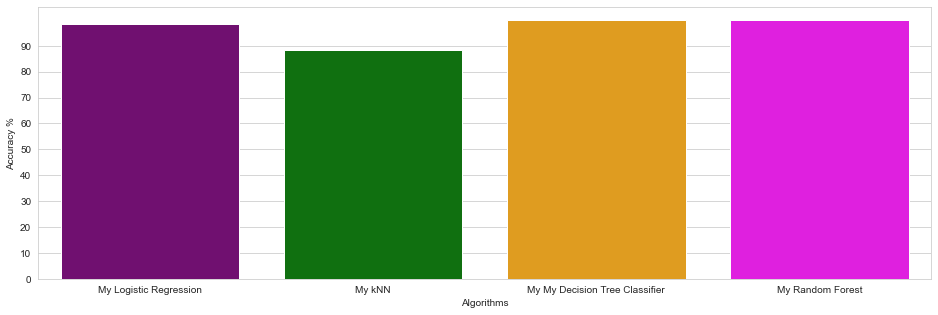

In [63]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize = (16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = list(accuracies_own.keys()), y = list(accuracies_own.values()), palette = colors)
plt.show()

#### Вывод
Лучший результат наблюдается у алгоритмов дерева решений и случайный лес, предсказание на тестовых данных дает 100% точность. Худшие показатели у алгоритма kNN 88% на тестовых данных.

### Второй датасет

Вторым датасетом я выбрала простой и понятный датасет качества красного вина. Этот набор данных должен отлично подойти для регрессионного или классификационного моделирования.

Импортируем необходимые библиотеки.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Считаем надбор данных и выведем первые 5 строк.

In [65]:
ds2 = pd.read_csv('/Users/linuxoid/Desktop/VUZICH/ML/input_data/winequality-red.csv')
ds2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Проверка на наличие пропущенных данных.

In [66]:
ds2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

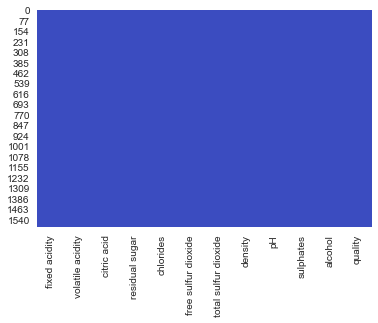

In [67]:
sns.heatmap(ds2.isnull(), cbar = False, cmap='coolwarm')

Повезло, пропущенных данных нет. Насколько мне известно, такое случается редко!

In [68]:
#Input variables (based on physicochemical tests):
#    1 - fixed acidity        - фиксированная кислотность
#    2 - volatile acidity     - летучая кислотность
#    3 - citric acid          - лимонная кислота
#    4 - residual sugar       - остаточный сахар
#    5 - chlorides            - хлориды
#    6 - free sulfur dioxide  - свободный диоксид серы
#    7 - total sulfur dioxide - общий диоксид серы
#    8 - density              - плотность
#    9 - pH                   - водородный показатель(кислотность среды pH)
#    10 - sulphates           - сульфаты
#    11 - alcohol             - алкоголь
#Output variable:
#    12 - quality (score between 0 and 10) - качество (0 - 10)

ds2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Создадим бинарную классификацию качества вина. Плохое вино, если качество < 6.5 и хорошее соответственно > 6.5.

bad: quality < 6.5
good: quality > 6.5

In [69]:
ds2['bin_quality'] = pd.cut(ds2['quality'], bins = [0, 6.5, 10], labels = ['bad', 'good'])

Удалим колонки, которые не влияют на качество вина.

In [70]:
ds2.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'quality'], axis = 1, inplace = True)

Нормализуем данные.

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(ds2['bin_quality'])
ds2['bin_quality'] = le.fit_transform(ds2['bin_quality'])
print(ds2['bin_quality'])

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: bin_quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]
0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: bin_quality, Length: 1599, dtype: int64


In [72]:
y2 = ds2['bin_quality']

ds2.drop(['bin_quality'], axis = 1, inplace = True)

x2 = ds2

Разделим данные на тренировочные и тестировочные.

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import math
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
print('Train set:  ', x2_train.shape,  y2_train.shape)
print('Test set:   ', x2_test.shape,  y2_test.shape)

Train set:   (1279, 6) (1279,)
Test set:    (320, 6) (320,)


Нормализуем данные.

In [74]:
sc = StandardScaler()
x2_train = sc.fit_transform(x2_train)
x2_test = sc.transform(x2_test)

Определим функцию печати, где вычисляется точность и матрица ошибок как для тренировочных данных, так и для тестовых.

In [75]:
def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred, pos_label=0) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred, pos_label=0) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred, pos_label=0) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred, pos_label=0) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred, pos_label=0) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred, pos_label=0) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 1. Logistic Regression

Построим классификационную модель, используя логистическую регрессию.

In [76]:
accuracies = {}

lr2 = LogisticRegression(class_weight = 'balanced', tol = 1e-10)

lr2.fit(x2_train, y2_train)
print_score(lr2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(lr2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 78.58%
_______________________________________________
Classification Report:	Precision Score: 97.04%
			Recall Score: 77.43%
			F1 score: 86.13%
_______________________________________________
Confusion Matrix: 
 [[851 248]
 [ 26 154]]

Test Result:
Accuracy Score: 76.88%
_______________________________________________
Classification Report:	Precision Score: 97.29%
			Recall Score: 75.97%
			F1 score: 85.32%
_______________________________________________
Confusion Matrix: 
 [[215  68]
 [  6  31]]



Добавляем в табличку значения тренировочной точности и тестовой для модели обученной по алгоритму логистической регрессии.

In [77]:
train_score = accuracy_score(y2_train, lr2.predict(x2_train)) * 100
test_score = accuracy_score(y2_test, lr2.predict(x2_test)) * 100

accuracies['Logistic Regression'] = test_score

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.577013,76.875


### 2. kNN

Построим классификационную модель, используя kNN алгоритм.

In [78]:
knn2 = KNeighborsClassifier() 
knn2.fit(x2_train, y2_train)

print_score(knn2, x2_train, y2_train, x2_test, y2_test, train=True)
print_score(knn2, x2_train, y2_train, x2_test, y2_test, train=False)

Train Result:
Accuracy Score: 90.93%
_______________________________________________
Classification Report:	Precision Score: 93.15%
			Recall Score: 96.54%
			F1 score: 94.82%
_______________________________________________
Confusion Matrix: 
 [[1061   38]
 [  78  102]]

Test Result:
Accuracy Score: 90.00%
_______________________________________________
Classification Report:	Precision Score: 94.04%
			Recall Score: 94.70%
			F1 score: 94.37%
_______________________________________________
Confusion Matrix: 
 [[268  15]
 [ 17  20]]



In [79]:
test_score = accuracy_score(y2_test, knn2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, knn2.predict(x2_train)) * 100

accuracies['KNN'] = test_score


tmp = pd.DataFrame(data=[["KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.577013,76.875
1,KNN,90.930414,90.000


### 3. Decision Tree

Построим классификационную модель, используя Decision Tree алгоритм.

In [80]:
dt2 = DecisionTreeClassifier(random_state = 42)

dt2.fit(x2_train, y2_train)

print_score(dt2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(dt2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[1099    0]
 [   0  180]]

Test Result:
Accuracy Score: 88.75%
_______________________________________________
Classification Report:	Precision Score: 96.60%
			Recall Score: 90.46%
			F1 score: 93.43%
_______________________________________________
Confusion Matrix: 
 [[256  27]
 [  9  28]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью алгоритма дерева решений.

In [81]:
test_score = accuracy_score(y2_test, dt2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, dt2.predict(x2_train)) * 100

accuracies['Decision Tree Classifier'] = test_score

tmp = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.577013,76.875
1,KNN,90.930414,90.000
2,Decision Tree Classifier,100.000000,88.750


### 4. Random Forest

Построим классификационную модель, используя Random Forest алгоритм.

In [82]:
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 42)

rf2.fit(x2_train, y2_train)

print_score(rf2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(rf2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[1099    0]
 [   0  180]]

Test Result:
Accuracy Score: 91.25%
_______________________________________________
Classification Report:	Precision Score: 95.37%
			Recall Score: 94.70%
			F1 score: 95.04%
_______________________________________________
Confusion Matrix: 
 [[268  15]
 [ 13  24]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью алгоритма случайного леса.

In [83]:
test_score = accuracy_score(y2_test, rf2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, rf2.predict(x2_train)) * 100

accuracies['Random Forest'] = test_score

tmp = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(tmp, ignore_index=True)

Построим график, показывающий тестовые точности всех моделей.

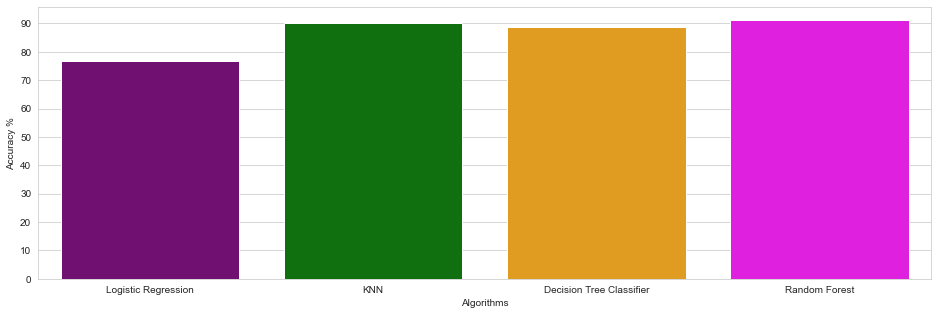

In [84]:
colors = ["purple", "green", "orange", "magenta", "#CFC60E", "#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize = (16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = colors)
plt.show()

In [85]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.577013,76.875
1,KNN,90.930414,90.000
2,Decision Tree Classifier,100.000000,88.750
3,Random Forest Classifier,100.000000,91.250


###### Вывод:
Анализируя график и полученную табличку, видно, что наилучший результат показывает модель, обученная на алгоритме Random Forest. На втором месте идет kNN модель, затем Decision Tree. Ну и самые худшие показатели у логистической регрессии в 77% на тестовых данных.

## Применение алгоритмов машинного обучения с использованием тюнинга гиперпараметров

### 1. Logistic Regression Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg2 = LogisticRegression()

grid_search_cv2 = GridSearchCV(log_reg2, params, scoring = "accuracy",
                              n_jobs=-1, verbose=1, cv=5, iid = True)
grid_search_cv2.fit(x2_train, y2_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-0...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [87]:
grid_search_cv2.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
log_reg2 = LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

log_reg2.fit(x2_train, y2_train)

print_score(log_reg2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(log_reg2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 86.63%
_______________________________________________
Classification Report:	Precision Score: 88.93%
			Recall Score: 96.45%
			F1 score: 92.54%
_______________________________________________
Confusion Matrix: 
 [[1060   39]
 [ 132   48]]

Test Result:
Accuracy Score: 90.94%
_______________________________________________
Classification Report:	Precision Score: 92.62%
			Recall Score: 97.53%
			F1 score: 95.01%
_______________________________________________
Confusion Matrix: 
 [[276   7]
 [ 22  15]]



Получаем приемлемую точность в 86.63% на тренировочных и 90.94% на тестовых.

Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью логистической регрессии.

In [89]:
test_score = accuracy_score(y2_test, log_reg2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, log_reg2.predict(x2_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.63018,90.9375


### 2. kNN Hyperparameter Tuning

Обучим модель kNN на различных значениях neighbors.

In [90]:
train_score = []
test_score = []
neighbors = range(2, 21)

for k in neighbors:
    model2 = KNeighborsClassifier(n_neighbors = k)
    model2.fit(x2_train, y2_train)
    train_score.append(accuracy_score(y2_train, model2.predict(x2_train)))
    test_score.append(accuracy_score(y2_test, model2.predict(x2_test)))

Строим график, на котором найдем максимальную оценку на тестовых данных и определим соответствующее количество neighbors. Это и будет лучшим параметром для kNN.

Maximum KNN score on the test data: 91.25%


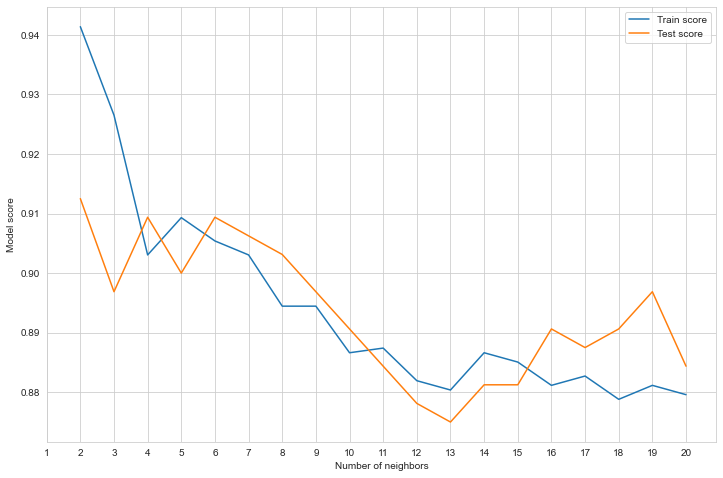

In [91]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label = "Train score")
plt.plot(neighbors, test_score, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score) * 100:.2f}%")

Наибольшее значение при 4 neighbors.

Обучаем модель на только что полученных лучших гиперпараметрах и выводим метрики.

In [92]:
knn_classifier2 = KNeighborsClassifier(n_neighbors = 4)
knn_classifier2.fit(x2_train, y2_train)

print_score(knn_classifier2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(knn_classifier2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 90.30%
_______________________________________________
Classification Report:	Precision Score: 91.35%
			Recall Score: 98.00%
			F1 score: 94.56%
_______________________________________________
Confusion Matrix: 
 [[1077   22]
 [ 102   78]]

Test Result:
Accuracy Score: 90.94%
_______________________________________________
Classification Report:	Precision Score: 92.91%
			Recall Score: 97.17%
			F1 score: 94.99%
_______________________________________________
Confusion Matrix: 
 [[275   8]
 [ 21  16]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью kNN.

In [93]:
test_score = accuracy_score(y2_test, knn_classifier2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, knn_classifier2.predict(x2_train)) * 100

tmp = pd.DataFrame(data = [["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(tmp, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.630180,90.9375
1,Tuned K-nearest neighbors,90.304926,90.9375


Среди двух моделей выигрышной является kNN 	с точностью на тренировочных данных 89.523065, тестовых данных 86.8750.

### 3. Decision Tree Classifier Hyperparameter Tuning

In [94]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree2 = DecisionTreeClassifier(random_state = 42)
grid_search_cv2 = GridSearchCV(tree2, params, scoring = "accuracy",
                              n_jobs = -1, verbose = 1, cv = 3, iid = True)
grid_search_cv2.fit(x2_train, y2_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 9720 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   14.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid=True, n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_d

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [95]:
grid_search_cv2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

Обучаем модель на только что полученных лучших гиперпараметрах и выводим метрики.

In [96]:
tree2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')
tree2.fit(x2_train, y2_train)

print_score(tree2, x2_train, y2_train, x2_test, y2_test, train = True)
print_score(tree2, x2_train, y2_train, x2_test, y2_test, train = False)

Train Result:
Accuracy Score: 87.88%
_______________________________________________
Classification Report:	Precision Score: 89.27%
			Recall Score: 97.63%
			F1 score: 93.26%
_______________________________________________
Confusion Matrix: 
 [[1073   26]
 [ 129   51]]

Test Result:
Accuracy Score: 85.62%
_______________________________________________
Classification Report:	Precision Score: 90.17%
			Recall Score: 93.99%
			F1 score: 92.04%
_______________________________________________
Confusion Matrix: 
 [[266  17]
 [ 29   8]]



Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью Decision Tree.

In [97]:
test_score = accuracy_score(y2_test, tree2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, tree2.predict(x2_train)) * 100

tmp = pd.DataFrame(data = [["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(tmp, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.630180,90.9375
1,Tuned K-nearest neighbors,90.304926,90.9375
2,Tuned Decision Tree Classifier,87.881157,85.6250


Среди трех моделей наилучшие показатели наблюдаются у алгоритма kNN с тюнинговыми гиперпараметрами.

### 4. Random Forest Classifier Hyperparameter Tuning

Для алгоритма Random Forest применим случайный поиск. В случайном поиске мы создаем сетку гиперпараметров и обучаем / тестируем нашу модель только на некоторой случайной комбинации этих гиперпараметров. 

In [99]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest2 = RandomForestClassifier(random_state=42)

rf_random2 = RandomizedSearchCV(estimator=rand_forest2, param_distributions=random_grid,
                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


rf_random2.fit(x2_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Получаем набор гиперпараметров, которые лучше всего работали во время обучения, чтобы проверить нашу модель.

In [100]:
rf_random2.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Обучаем модель на самых лучших гиперпараметрах.

In [101]:
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest2.fit(x2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Печатаем полученные метрики.

In [102]:
print_score(rand_forest2, x2_train, y2_train, x2_test, y2_test, train=True)
print_score(rand_forest2, x2_train, y2_train, x2_test, y2_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[1099    0]
 [   0  180]]

Test Result:
Accuracy Score: 90.62%
_______________________________________________
Classification Report:	Precision Score: 95.34%
			Recall Score: 93.99%
			F1 score: 94.66%
_______________________________________________
Confusion Matrix: 
 [[266  17]
 [ 13  24]]



Получили хорошие значения точности как на тестовых, так и на тренировочных данных.

Добавляем в табличку значения тестовой и тренировочной точности предсказания для модели, обученной с помощью Random Forest.

In [103]:
test_score = accuracy_score(y2_test, rand_forest2.predict(x2_test)) * 100
train_score = accuracy_score(y2_train, rand_forest2.predict(x2_train)) * 100

results_df_2 = pd.DataFrame(data = [["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index = True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.630180,90.9375
1,Tuned K-nearest neighbors,90.304926,90.9375
2,Tuned Decision Tree Classifier,87.881157,85.6250
3,Tuned Random Forest Classifier,100.000000,90.6250


Их всех четырех алгоритмов наилучший результат показал случайный лес на тренировочных данных, а на тестовых данных хорошо себя проявили логистическая регрессия и алгоритм kNN.

### Вывод

Выполнив данную лабораторную работу, я научилась реализовывать популярные алгоритмы машинного обучения, провела анализ полученных моделей, вычислила метрики классификатора. Также я сделала тюнинг гиперпараметров, что является оптимизацией алгоритмов. Хотелось бы отметить преимущества и недостатки каждого из рассмотренных алгоритмов.


#### 1. Logistic Regression

Преимущества.

Это широко используемый метод, потому что он очень эффективен, не требует слишком большого количества вычислительных ресурсов. Его легко понять и объяснить. Легко упорядочить и выводит хорошо откалиброванные предсказанные вероятности. Логистическая регрессия работает лучше, когда вы удаляете атрибуты, которые не связаны с выходной переменной, а также атрибуты, которые очень похожи (коррелированы) друг на друга.

Недостатки.

Недостатком этого метода является то, что мы не можем решать нелинейные задачи с помощью логистической регрессии, поскольку ее поверхность принятия решений является линейной.
Логистическая регрессия также не является одним из самых мощных алгоритмов и может быть легко превзойдена более сложными. Это также алгоритм, который известен своей уязвимостью к переобучению.

#### 2. kNN

Преимущества.

Алгоритм устойчив к аномальным выбросам, так как вероятность попадания такой записи в число k-ближайших соседей мала. Если же это произошло, то влияние на голосование (особенно взвешенное) (при k>2) также, скорее всего, будет незначительным, и, следовательно, малым будет и влияние на итог классификации.
Программная реализация алгоритма относительно проста.
Результат работы алгоритма легко поддаётся интерпретации. 
Возможность модификации алгоритма, путём использования наиболее подходящих функций сочетания и метрик позволяет подстроить алгоритм под конкретную задачу.

Недостатки. 

Набор данных, используемый для алгоритма, должен быть репрезентативным. Модель нельзя "отделить" от данных: для классификации нового примера нужно использовать все примеры. Эта особенность сильно ограничивает использование алгоритма.


#### 3. Decision Tree

Преимущества.

Этот алгоритм простой для понимания, интерпретации, визуализации.
Деревья решений неявно выполняют скрининг переменных или выбор функций.
Может обрабатывать как числовые, так и категориальные данные. Может также обрабатывать проблемы с несколькими выходами.
Деревья решений требуют относительно небольших усилий от пользователей для подготовки данных.
Нелинейные отношения между параметрами не влияют на производительность дерева.

Недостатки.

Новички, использующие дерево решений, могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением.
Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Это называется дисперсией (variance), которая должна быть снижена такими методами, как bagging и boosting.
Жадные алгоритмы не могут гарантировать возвращение глобально оптимального дерева решений. Это может быть смягчено путем обучения нескольких деревьев, где элементы и образцы выбираются случайным образом с заменой.


#### 4. Random Forest

Преимущества.

Случайные леса рассматриваются как высокоточный и надежный метод из-за количества деревьев решений, участвующих в процессе. Также, этот алгоритм не склонен к переобучению. Он преодолевает эту проблему путем усреднения или объединения результатов различных деревьев решений. Алгоритм может использоваться как в задачах классификации, так и в регрессии. Случайные леса хорошо работают с большим количеством элементов данных, чем одно дерево решений. Случайный лес имеет меньшую дисперсию, чем одно дерево решений. Случайные леса очень гибки и обладают очень высокой точностью. Случайные леса также могут обрабатывать пропущенные значения. 

Недостатки.

Сложность является основным недостатком алгоритмов случайного леса.
Построение случайных лесов намного сложнее и отнимает больше времени, чем деревья решений. Случайные леса медленно генерируют прогнозы, потому что у них есть несколько деревьев решений. Всякий раз, когда делается прогноз, все деревья в лесу должны сделать прогноз для одного и того же заданного ввода, а затем выполнить голосование по нему. Весь этот процесс занимает много времени. Модель трудно интерпретировать по сравнению с деревом решений, где вы можете легко принять решение, следуя пути в дереве.
